In [1]:
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 21.7 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29250 sha256=3942fb8dbc351a505a852c8299259dd3106f770b09fac11e16fe3eac2c8746f9
  Stored in directory: /root/.cache/pip/wheels/e6/5c/6b/790df3d7037e3d9aaf7a48d563626941f2f60198d2f1eef8d2
Successfully built httpsproxy-urllib2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [167]:
import gutenbergpy.textget
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [168]:
import pandas as pd

In [169]:
df = pd.read_csv("Amazon_Review_Tarea_2.csv")

In [170]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [171]:
df.groupby('ProductId')['Text'].count().sort_values(ascending=False)

,Text
ProductId,
B007JFMH8M,913
B002QWP89S,632
B002QWP8H0,632
B002QWHJOU,632
B0026RQTGE,632
...,...
B0029TATL0,1
B0029TJR7M,1
B0029U7OBM,1


In [172]:
df = df[df['ProductId'] == 'B007JFMH8M']

In [173]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
562970,562971,B007JFMH8M,A368Z46FIKHSEZ,"jaimoi ""Appreciator of good music""",0,0,5,1343433600,Delicious!,I love these cookies! Not only are they healt...
562971,562972,B007JFMH8M,A1JAPP1CXRG57A,"Linda Painchaud-Steinman ""PARK EDGE BOOKS""",0,0,5,1343433600,Great Anytime of Day!,Quaker Soft Baked Oatmeal Cookies with raisins...
562972,562973,B007JFMH8M,A2Z9JNXPIEL2B9,carwash169,0,0,5,1343433600,Very good!,I am usually not a huge fan of oatmeal cookies...
562973,562974,B007JFMH8M,A31CYJQO3FL586,"P. Titus ""Knitgirlll""",0,0,5,1343433600,Quaker Oats Oatmeal Raisin Mom Voxbox Review C...,I participated in a product review that includ...
562974,562975,B007JFMH8M,A2KXQ2EKFF3K2G,Jessica,0,0,5,1343433600,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to giv...


In [174]:
df_grouped = df.groupby('ProductId')['Text']

In [175]:
df_grouped.head()

,Text
562970,I love these cookies! Not only are they healt...
562971,Quaker Soft Baked Oatmeal Cookies with raisins...
562972,I am usually not a huge fan of oatmeal cookies...
562973,I participated in a product review that includ...
562974,My kids loved these. I was very pleased to giv...


In [176]:
df_lits = df_grouped.apply(list).reset_index()

In [177]:
Text = df_lits['Text']

In [178]:
Text = Text.astype(str)

In [179]:
def tokenizar(txt):
    texto_limpio = re.sub(r'[^\w\s]', '', txt.lower()) # Eliminamos signos de puntuación y ponemos todo en minúsculas

    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(texto_limpio)
    texto_filtrado = [word for word in tokens if word not in stop_words]
    return texto_filtrado

map_libro = list(map(tokenizar, Text))
tokens = []
for token in map_libro:
    tokens.extend(token)

In [180]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(x) for x in tokens]

In [181]:
df = pd.DataFrame(lemmatized_words)
conteo_frecuencias = df.value_counts()
df_frecuencias = conteo_frecuencias.to_frame()
df_frecuencias.reset_index(inplace = True)
df_frecuencias.columns = ['token', 'conteo']

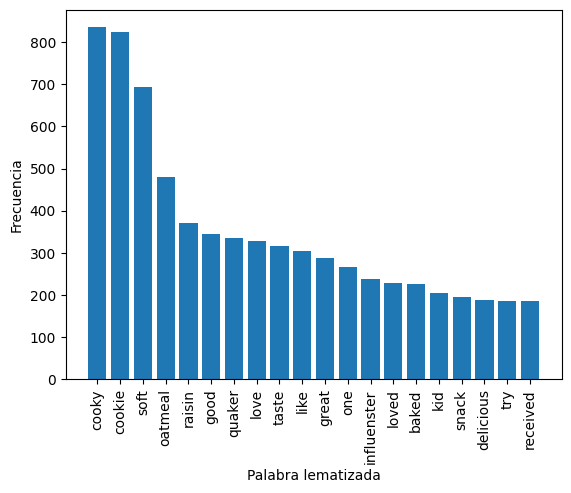

In [183]:
plt.figure()
plt.bar(df_frecuencias.iloc[:20].token, df_frecuencias.iloc[:20].conteo)
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.xlabel('Palabra lematizada')
plt.show()

In [184]:
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )

In [185]:
df_tokens = pd.DataFrame(tokens, columns = ['token'])

In [186]:
def perfil_sentimientos(df):
    print('Articulo B007JFMH8M')
    print("=" * 12)
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")
    print(" ")

In [187]:
df_sentimiento = tweets_sentimientos = pd.merge(
                            left     = df_tokens,
                            right    = lexicon,
                            left_on  = "token",
                            right_on = "termino",
                            how      = "inner"
                      )

In [188]:
df_sentimiento

,token,termino,sentimiento
0,love,love,3
1,healthy,healthy,2
2,great,great,3
3,delicious,delicious,3
4,great,great,3
...,...,...,...
3908,wish,wish,1
3909,love,love,3
3910,great,great,3
3911,good,good,3


In [189]:
perfil_sentimientos(df_sentimiento)

Articulo B007JFMH8M
Positivos: 91.52
Neutros  : 0.0
Negativos: 8.48
 
